In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import json
import numpy
pd.set_option('display.max_columns', 50)
plt.style.use("seaborn")

### Reading and Preparing the Data

In [2]:
data1 = pd.read_json("./data/epl2017.json", lines=True)
data2 = pd.read_json("./data/epl2018.json", lines=True)
data3 = pd.read_json("./data/epl2019.json", lines=True)
data4 = pd.read_json("./data/epl2020.json", lines=True)

In [3]:
def getDataFrame(data):
    """Takes the dataframe and generates a new empty dataframe with column names from the keys of the dict

    Args:
        data (pd.DataFrame): the dataframe object
    
    Returns:
        pd.DataFrame: a new empty dataframe with the necessary columns
    """

    # take all the columns of the main dataframe in the columns variable
    columns = list(data.columns)

    # appending all the keys from each json data in the row
    # since the first row has all the values we use that
    [columns.append(key) for key in data.general_stats.iloc[0].keys()]
    [columns.append(key) for key in data.passing_stats.iloc[0].keys()]
    [columns.append(key) for key in data.offensive_stats.iloc[0].keys()]
    [columns.append(key) for key in data.defensive_stats.iloc[0].keys()]

    target_cols = ["offensive_stats", "defensive_stats",
                   "general_stats", "passing_stats"]


    df = pd.DataFrame(columns=columns)
    df.drop(columns=target_cols, inplace=True)
    
    return df

def fillDataFrame(data, df):
    """Fills the new dataframe from the old datafrme in place

    Args:
        data (pd.DataFrame): the old dataframe from which the data needs to be extracted
        df (pd.DataFrame): the new dataframe to which the data needs to be updated
    """

    target_cols = ["offensive_stats", "defensive_stats",
                   "general_stats", "passing_stats"]

    for column in data.columns:
        if column not in target_cols:
            df[column] = data[column]
        else:
            # iterate over all the records of that row and fetch data
            for idx, row in enumerate(data[column]):
                try:
                    for key, value in row.items():
                        df[key].iloc[idx] = value
                except Exception as e:
                    pass


    val = lambda data: data["$oid"]
    df._id = df._id.apply(val)


        # convert all the object types to float if it allows else the exception block will catch them
    for column in df.columns:
        try:
            if df[column].dtype == "object":
                df[column] = df[column].astype(float)
        except Exception as e:
            pass

In [4]:
# 2017 data
df1 = getDataFrame(data1)
fillDataFrame(data1, df1)

# 2018 data
df2 = getDataFrame(data2)
fillDataFrame(data2, df2)

# 2019 data
df3 = getDataFrame(data3)
fillDataFrame(data3, df3)

# 2020 data
df4 = getDataFrame(data4)
fillDataFrame(data4, df4)


/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### Plots Helper Functions

In [5]:
def generatePlot(player, player_image_file):
    """Prints a dashboard for the player
    """

    data = [df1, df2, df3, df4]
    season = ["2017/18", "2018/19", "2019/20", "2020/21"]

    goals = []
    npg = []
    xg = []
    assists = []
    xa = []
    passes = []
    key_pass = []
    tklw = []
    interceptions = []
    blocks = []
    games = []
    minutes = []

    image_path = "./player_images/"
    
    for df in data:
        try:
            goals.append(df[df["name"] == player]["goals"].values)
            npg.append(df[df["name"] == player]["npg"].values)
            xg.append(df[df["name"] == player]["xG"])
            assists.append(df[df["name"] == player]["assists"].values)
            xa.append(df[df["name"] == player]["xA"])
            passes.append(df[df["name"] == player]["Cmp"])
            key_pass.append(df[df["name"] == player]["key_passes"])
            blocks.append(df[df["name"] == player]["Blocks"])
            interceptions.append(df[df["name"] == player]["Int"])
            tklw.append(df[df["name"] == player]["TklW"])
            games.append(df[df["name"] == player]["games"].values)
            minutes.append(df[df["name"] == player]["time"].values)
        except:
            goals.append(0)
            npg.append(0)
            xg.append(0)
            passess.append(0)
            key_passes.append(0)
            blocks.append(0)
            interceptions.append(0)
            tklw.append(0)
            games.append(0)
            minutes.append(0)

    # creating the dashboard
    plt.style.use("seaborn")
    plt.tight_layout()
    fig = plt.figure()
    text = f"{player} in the Premier Leagure (2017-18 to 2020-21)"
    fig.suptitle(t=text, x=.7, y=1.7, fontsize=14, fontweight="bold")
    
    ax1 = fig.add_axes([0,0,.7,1])
    ax2 = fig.add_axes([0.8, 0, .7, 1])
    ax3 = fig.add_axes([0, 1.1, .7, 0.5])
    ax4 = fig.add_axes([0.8, 1.1, .7, 0.5])
    ax1.margins(x=.1,y=.1)
    ax2.margins(x=.1,y=.1)

    # offensive stats
    ax1.plot(season, goals, label="Goals", marker="o")
    ax1.plot(season, xg, label="xG", marker="o")
    ax1.plot(season, assists, label="Assists", marker="o")
    ax1.plot(season, xa, label="xA", marker="o")
    ax1.plot(season, npg, label="Non Penalty Goals", marker="o")
    ax1.legend(loc=0)
    ax1.set_title("Offensive Stats")
    ax1.set_xlabel("Season")
    ax1.set_ylabel("Numbers")

    # defensive stats
    ax2.plot(season, tklw, label="Tackles Won", marker="o")
    ax2.plot(season, blocks, label="Blocks", marker="o")
    ax2.plot(season, interceptions, label="Interceptions", marker="o")
    ax2.legend(loc=0)
    ax2.set_title("Defensive Stats")
    ax2.set_xlabel("Season")
    ax2.set_ylabel("Numbers")

    # general stats
    ax4.axes.set_xticks([])
    ax4.axes.set_yticks([])
    ax4.axes.set_facecolor("white")
    ax4.text(0, 0.8, "Total Appearances: " + str(int(sum(games)[0])), fontweight="bold")
    ax4.text(0, 0.7, "Total Minutes: " + str(int(sum(minutes)[0])), fontweight="bold")
    ax4.text(0, 0.6, "Total Goals: " +
             str(int(sum(goals)[0])), fontweight="bold")
    ax4.text(0, 0.5, "Total Assits: " +
             str(int(sum(assists)[0])), fontweight="bold")
    ax4.text(0, 0.4, "Total Non Penalty Goals: " +
             str(int(sum(npg)[0])), fontweight="bold")
    ax4.text(0, 0.2, "Neel Patel Twitter: @neel6762", fontstyle="italic")
    ax4.set_title("Stats for the last 4 sesons (2017-18 to 2020-21)")

    # player image
    plt.style.use("classic")
    ax3.axes.set_xticks([])
    ax3.axes.set_yticks([])
    temp_img = plt.imread(image_path + player_image_file)
    ax3.imshow(temp_img)


### Marcus Rashford

<Figure size 576x396 with 0 Axes>

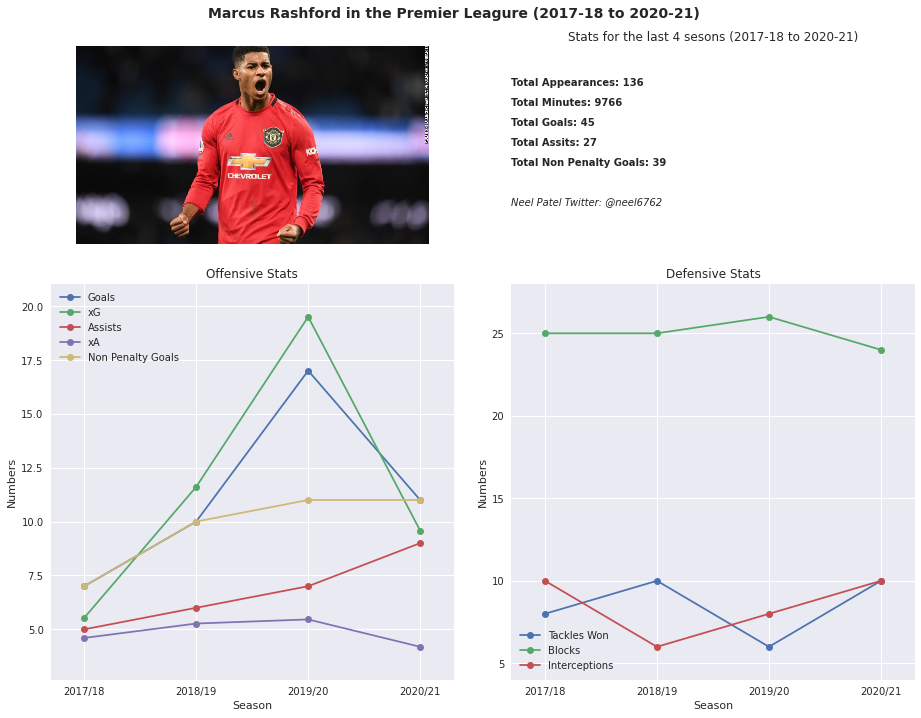

In [6]:
generatePlot("Marcus Rashford", "mr.jpeg")

### Anthony Martial

<Figure size 640x440 with 0 Axes>

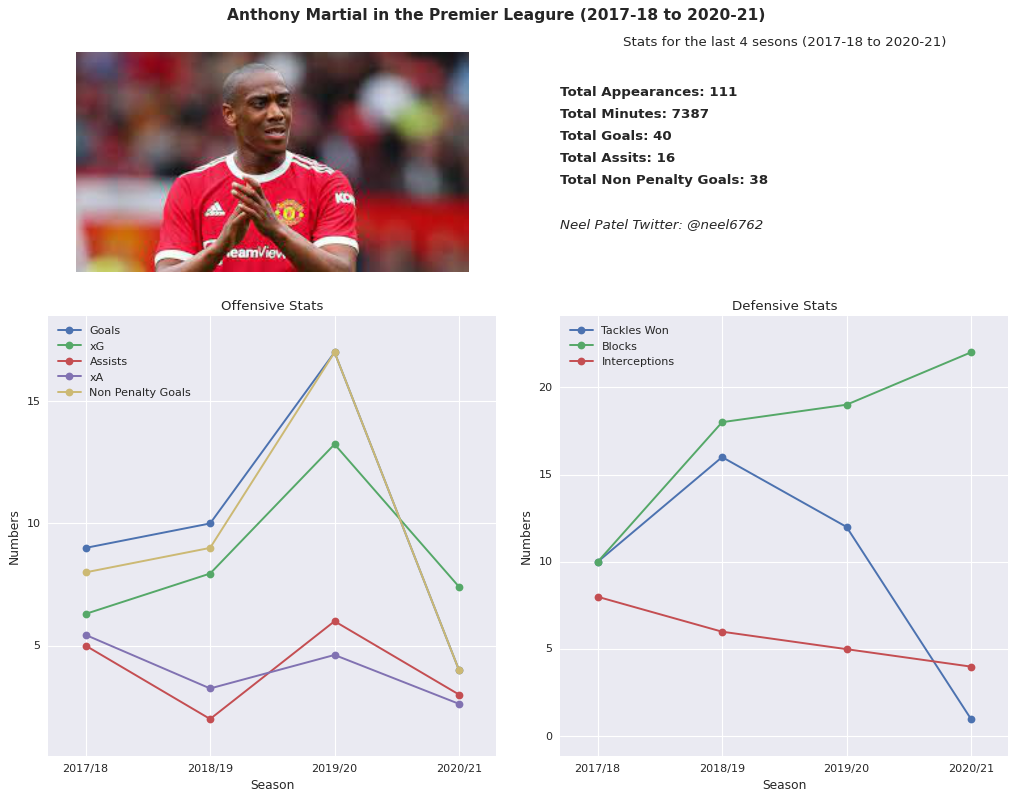

In [7]:
generatePlot("Anthony Martial", "martial.jpeg")

### Paul Pogba

<Figure size 640x440 with 0 Axes>

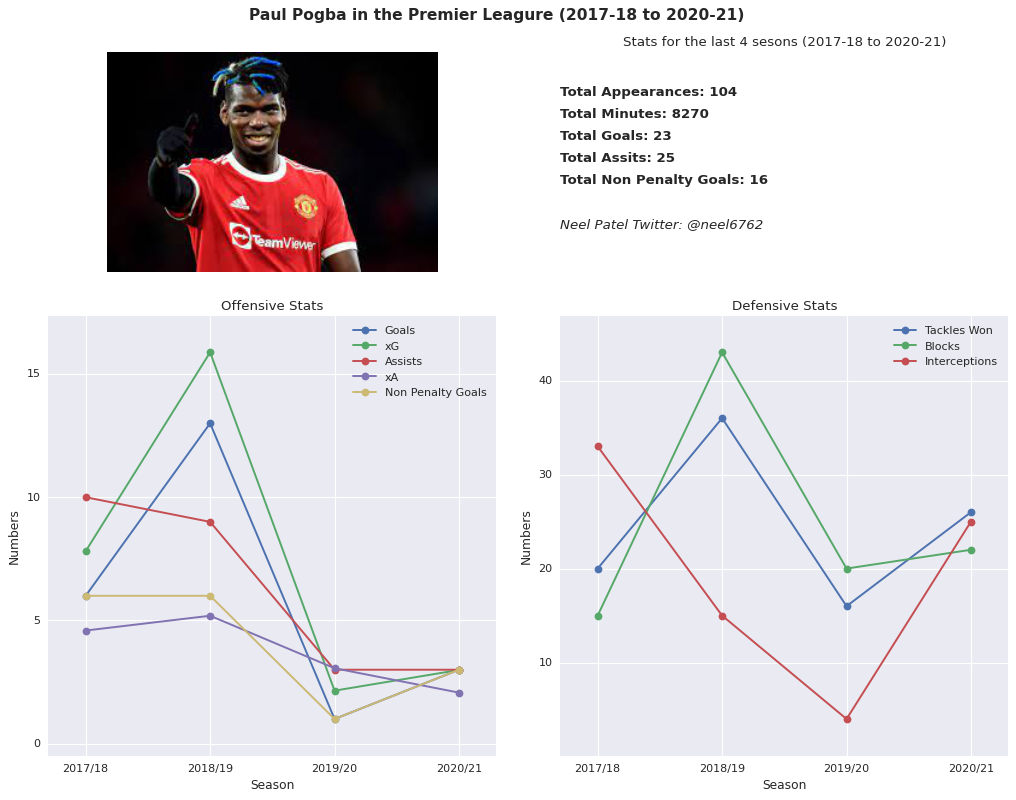

In [8]:
generatePlot("Paul Pogba", "pogba.jpeg")

### Raheem Sterling

<Figure size 640x440 with 0 Axes>

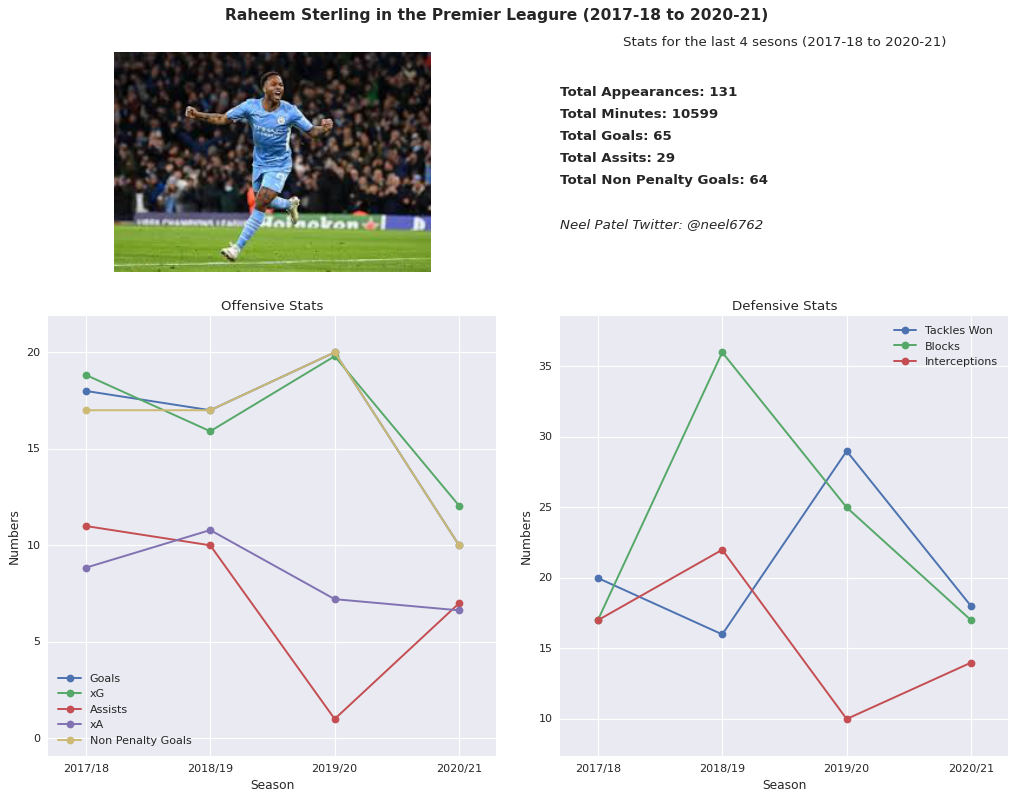

In [9]:
generatePlot("Raheem Sterling", "rs.jpeg")

### Mo Salah

<Figure size 640x440 with 0 Axes>

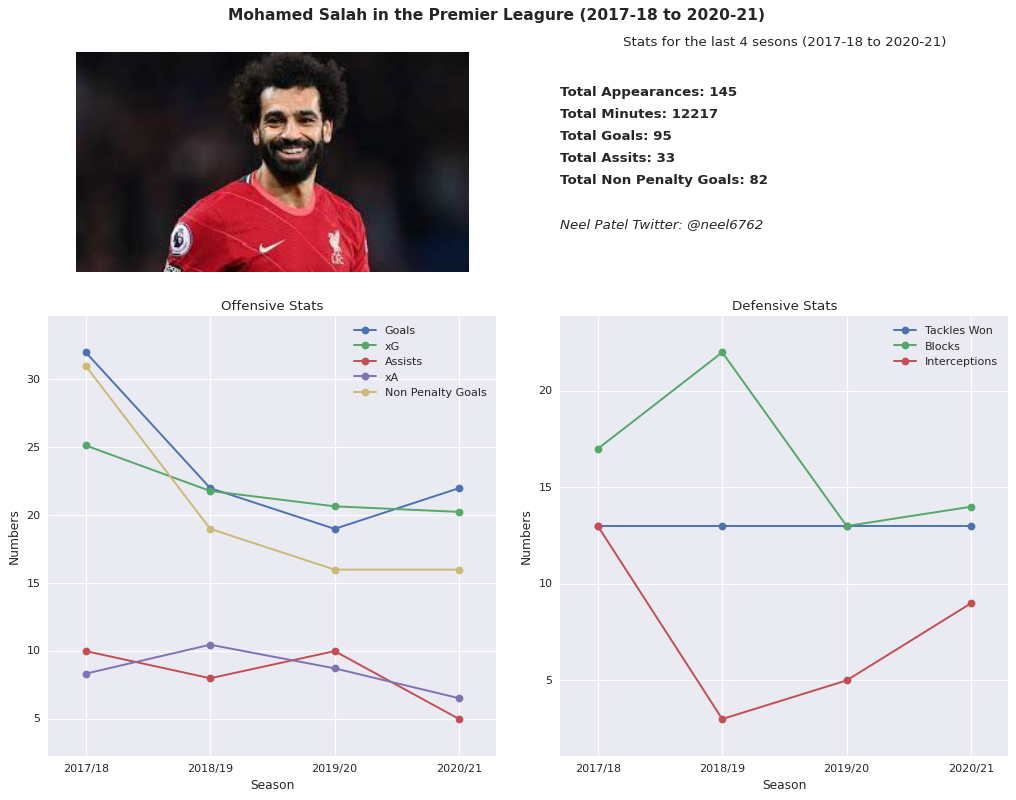

In [10]:
generatePlot("Mohamed Salah", "salah.jpeg")


### Harry Kane

<Figure size 640x440 with 0 Axes>

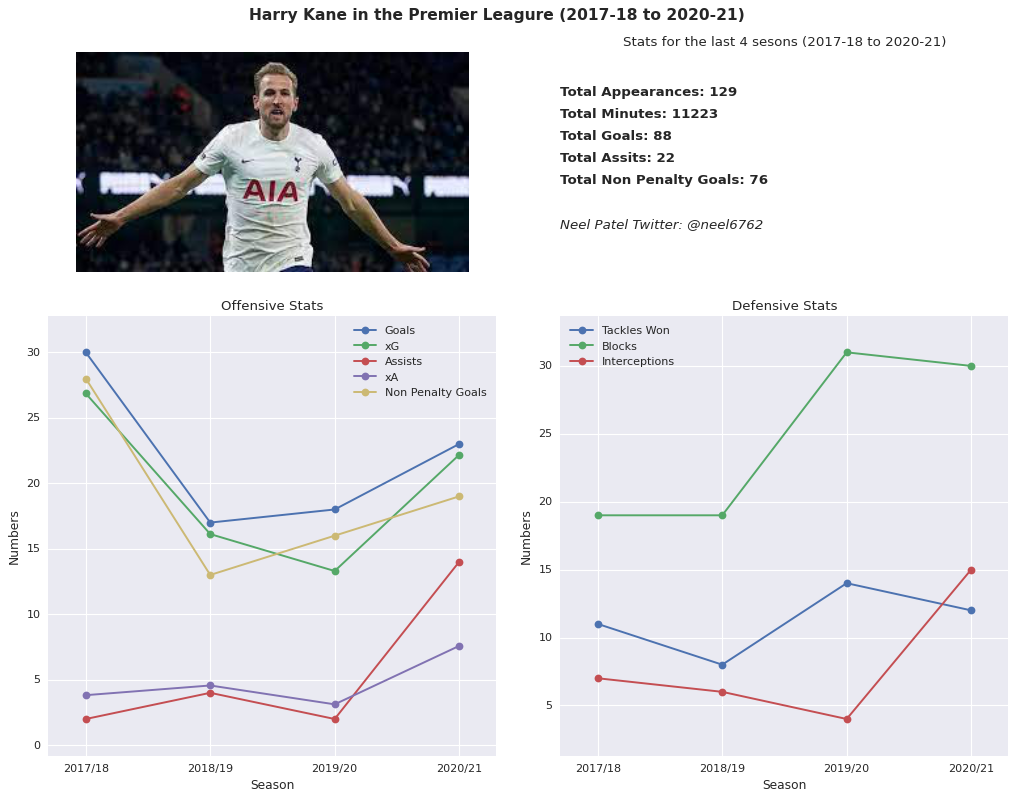

In [11]:
generatePlot("Harry Kane", "kane.jpeg")

### SON

<Figure size 640x440 with 0 Axes>

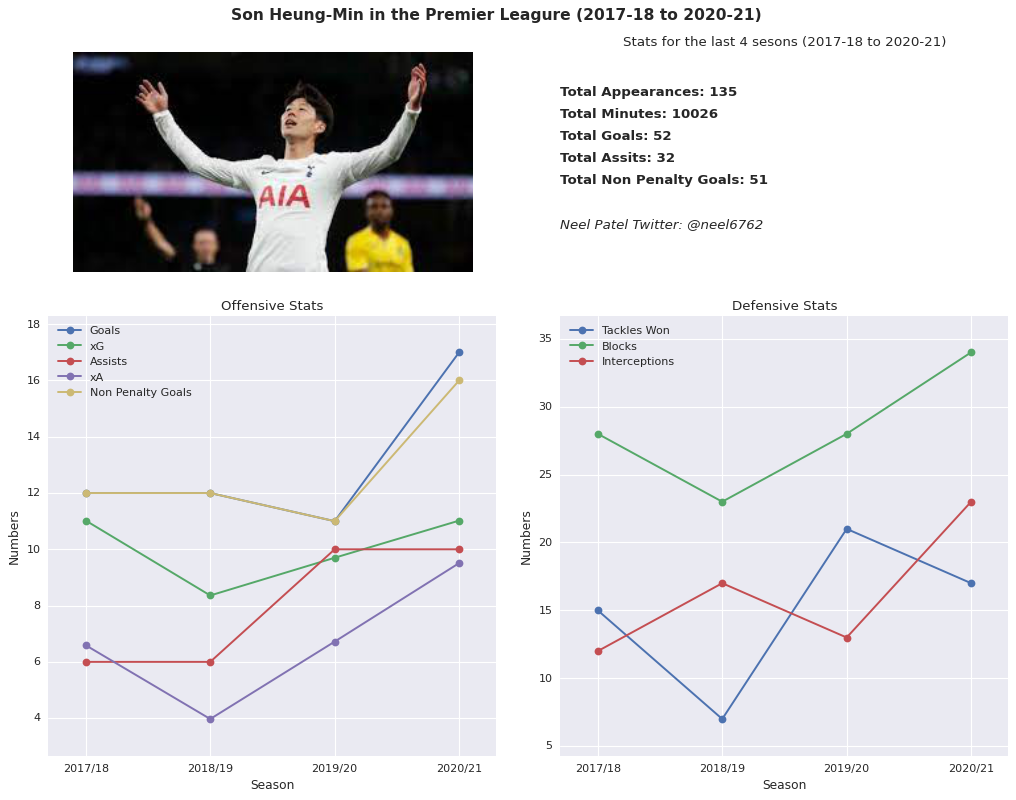

In [12]:
generatePlot("Son Heung-Min", "son.jpeg")

### KVD

<Figure size 640x440 with 0 Axes>

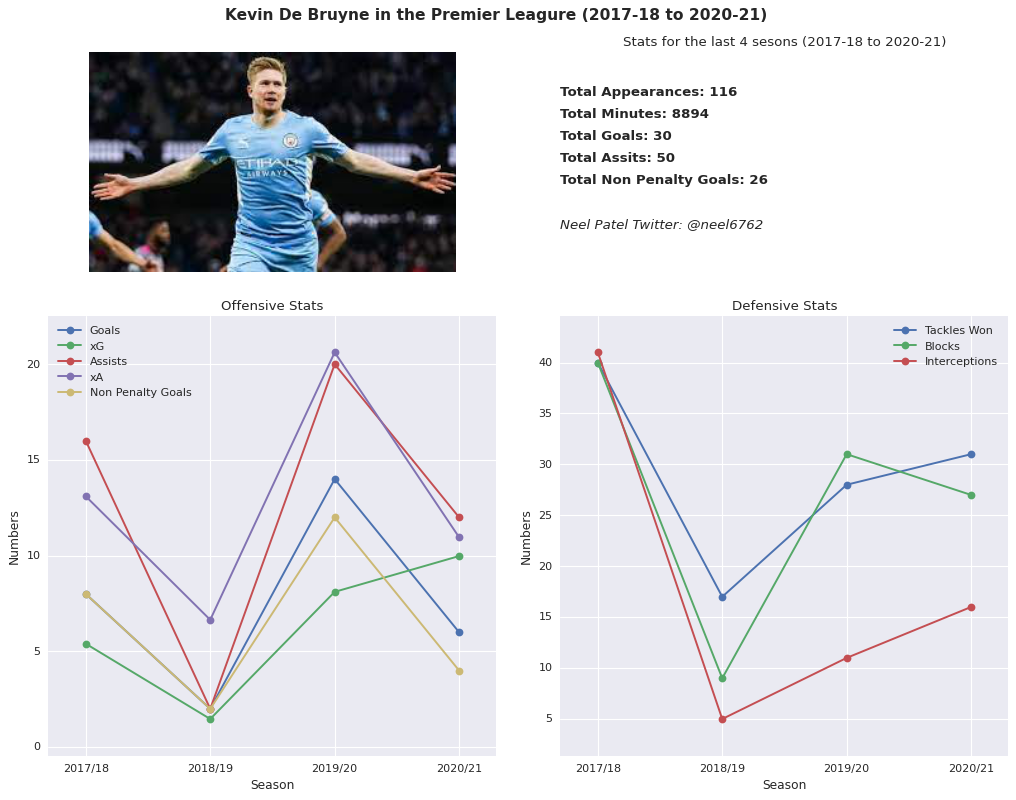

In [13]:
generatePlot("Kevin De Bruyne", "kdb.jpeg")


### Jamie Vardy

<Figure size 640x440 with 0 Axes>

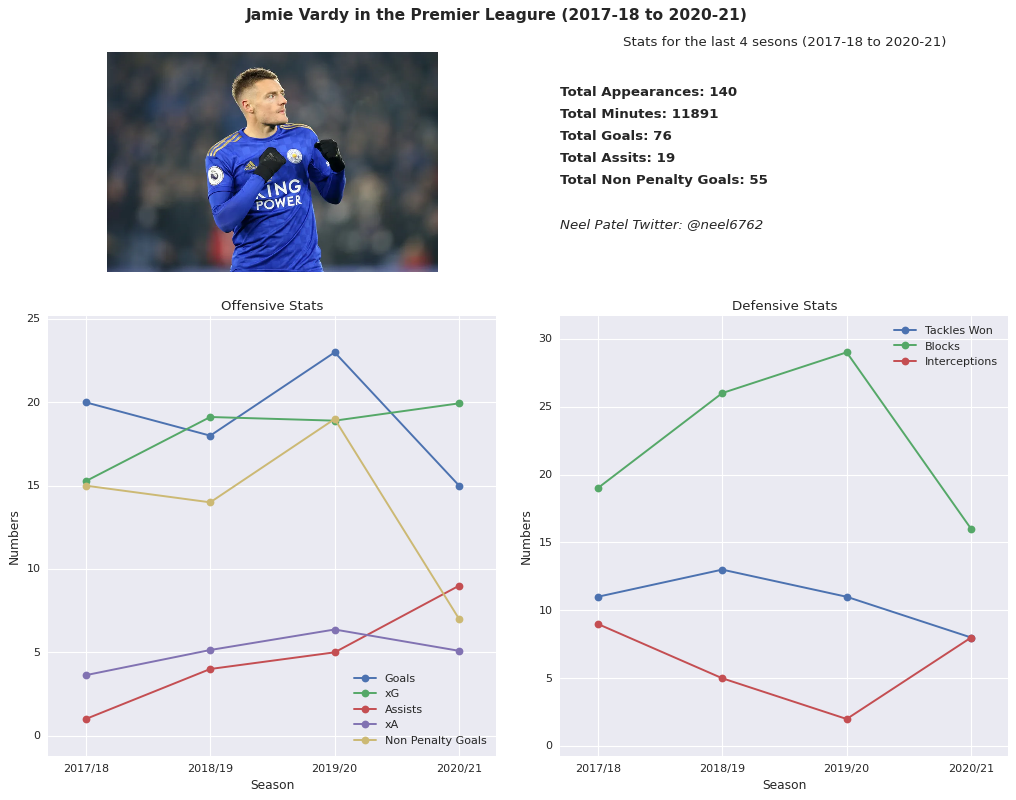

In [14]:
generatePlot("Jamie Vardy", "vardy.webp")

### Declan Rice

<Figure size 640x440 with 0 Axes>

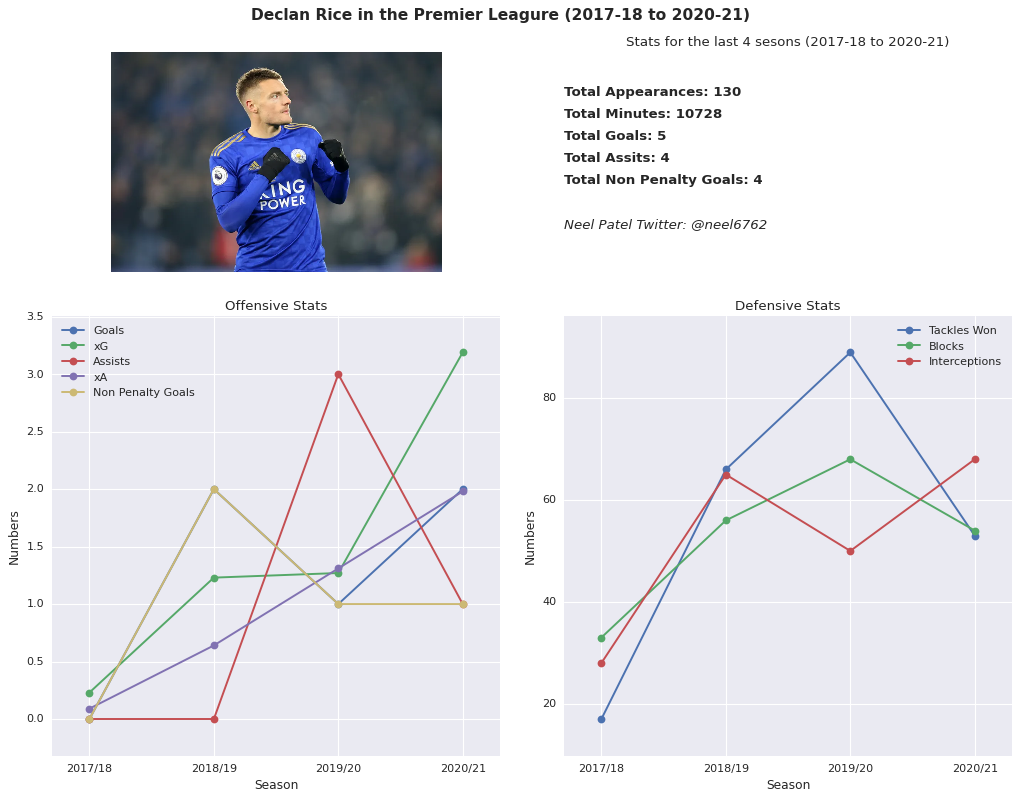

In [28]:
generatePlot("Declan Rice", "vardy.webp")

### Other Stats

In [15]:
def getTopStats(metric):
    """Prints the top metric stat for each season

    Args:
        metric (str): the metric whose stat is to be discovered like: goals, assists
    """

    data = [df1, df2, df3, df4]

    for df in data:
        max_stat = max(df[metric])
        player = df.query(metric + " == @max_stat")["name"].values[0]
        print(player, max_stat)

##### Top key passes for each season

In [16]:
getTopStats("key_passes")

Kevin De Bruyne 105.0
James Maddison 100.0
Kevin De Bruyne 133.0
Bruno Fernandes 95.0


#### Top goal scrorer each season

In [17]:
getTopStats("goals")

Mohamed Salah 32.0
Pierre-Emerick Aubameyang 22.0
Jamie Vardy 23.0
Harry Kane 23.0


#### Top assists

In [18]:
getTopStats("assists")

Kevin De Bruyne 16.0
Eden Hazard 15.0
Kevin De Bruyne 20.0
Harry Kane 14.0


#### Highesh shots taken

In [19]:
getTopStats("shots")

Harry Kane 183.0
Mohamed Salah 137.0
Mohamed Salah 132.0
Harry Kane 138.0


#### Blocks

In [20]:
getTopStats("Blocks")

Kyle Naughton 104.0
Charlie Taylor 128.0
Aaron Wan-Bissaka 101.0
Aaron Wan-Bissaka 113.0


#### Tackles Won

In [21]:
getTopStats("TklW")

Idrissa Gueye 89.0
Wilfred Ndidi 114.0
Declan Rice 89.0
Pierre-Emile HÃ¸jbjerg 82.0


#### Progressive Passes Attempted

In [22]:
getTopStats("PPA")

Kevin De Bruyne 122.0
Eden Hazard 99.0
Kevin De Bruyne 121.0
Trent Alexander-Arnold 101.0


#### Interceptions

In [23]:
getTopStats("Int")

Lewis Dunk 95.0
Aaron Wan-Bissaka 91.0
Harry Maguire 55.0
Jan Bednarek 78.0


#### Passes completed

In [24]:
getTopStats("Cmp")

NicolÃ¡s Otamendi 2825.0
Aymeric Laporte 2786.0
Virgil van Dijk 2791.0
Andrew Robertson 2567.0


#### Red Cards

In [25]:
getTopStats("red_cards")

Wilfred Ndidi 2.0
Wes Morgan 2.0
Christian Kabasele 2.0
Lewis Dunk 2.0


#### Yellow Cards

In [26]:
getTopStats("yellow_cards")

Oriol Romeu 11.0
Etienne Capoue 14.0
Luka Milivojevic 12.0
John McGinn 12.0


#### Non Penalty Goals

In [27]:
getTopStats("npg")

Mohamed Salah 31.0
Sadio ManÃ© 22.0
Danny Ings 21.0
Harry Kane 19.0
